# Binary Classification


In [34]:
#import paskages 
import numpy as np
import pandas as pd
from IPython.display import display
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [35]:
#load data
ion = pd.read_csv("data/ion.csv",index_col=0)
ion.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [36]:
df = ion.copy()


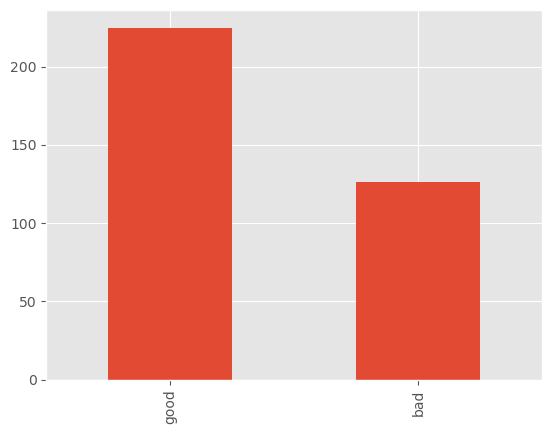

In [37]:
df['Class'].value_counts().plot(kind='bar')
plt.show()

In [38]:
#
df['Class']=df["Class"].map({"good":0 , 'bad':1})


1      0
2      1
3      0
4      1
5      0
      ..
347    0
348    0
349    0
350    0
351    0
Name: Class, Length: 351, dtype: int64

In [39]:
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

In [40]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

In [41]:
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True) 

In [42]:
X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

We'll define our model just like we did for the regression tasks, with one exception. In the final layer include a 'sigmoid' activation so that the model will produce class probabilities.



In [47]:
input_shape  =  X_train.shape[1]

In [49]:
#creare model 
model =keras.Sequential([
    layers.Dense(4 , activation="relu", input_shape=[input_shape]),
    layers.Dense(4 , activation="relu" ),
    layers.Dense(1, activation="sigmoid")
])

Add the cross-entropy loss and accuracy metric to the model with its compile method. For two-class problems, be sure to use 'binary' versions. (Problems with more classes will be slightly different.) The Adam optimizer works great for classification too, so we'll stick with it.



In [50]:
model.compile(optimizer="adam",
                 loss='binary_crossentropy',
                 metrics=['binary_accuracy'])

The model in this particular problem can take quite a few epochs to complete training, so we'll include an early stopping callback for convenience.



In [51]:
early_stopping = keras.callbacks.EarlyStopping(
                                                    
                                patience=10,
                                min_delta=0.001,
                                restore_best_weights=True
)

In [52]:
history=model.fit(
                X_train,   y_train, 
                validation_data=(X_valid , y_valid),
                batch_size=512  , epochs= 1000,
                callbacks=[early_stopping],
                verbose=0        #hide the output because we have so many epochs   
)

We'll take a look at the learning curves as always, and also inspect the best values for the loss and accuracy we got on the validation set. (Remember that early stopping will restore the weights to those that got these values.)



Best Validation Loss: 0.3078
Best Validation Accuracy: 0.8857


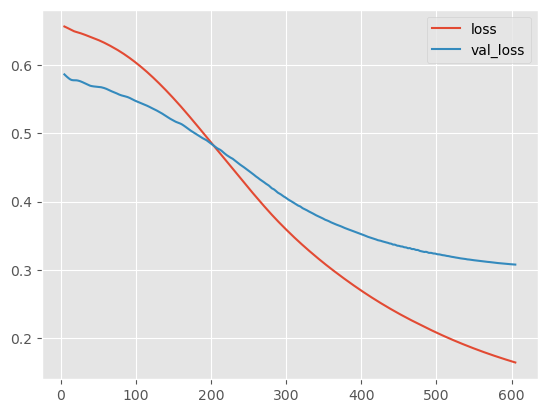

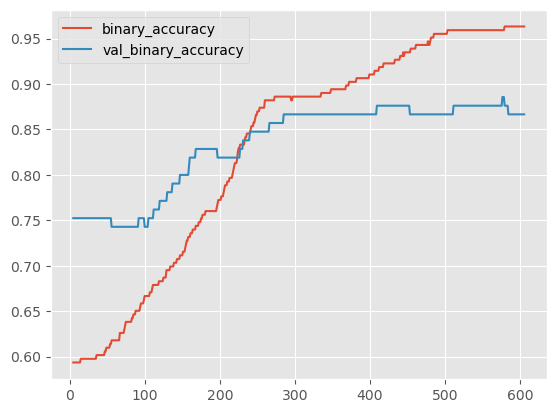

In [53]:
history_df = pd.DataFrame(history.history)

# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))